In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cvxopt # convex optimisation module
import SVM

### Hyperplane in 2D space

In [2]:
X_1, X_2 = np.linspace(-1.5, 1.5, 18), np.linspace(-1.5, 1.5, 18)
X_1_=np.einsum('i,ij->ij',X_1,np.ones((len(X_1),len(X_2))))
X_2_=np.einsum('j,ij->ij',X_2,np.ones((len(X_2),len(X_1))))
values = 1 + 2* X_1_ + 3* X_2_

In [3]:
X_1_gr, X_2_gr = X_1[np.argwhere(values>0)[:,0]], X_2[np.argwhere(values>0)[:,1]]
X_1_le, X_2_le = X_1[np.argwhere(values<0)[:,0]], X_2[np.argwhere(values<0)[:,1]]

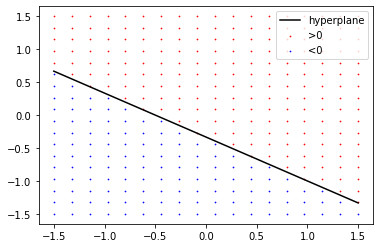

In [4]:
plt.scatter(X_1_gr,X_2_gr, c='r', s=.5, label='>0')
plt.scatter(X_1_le,X_2_le, c='b', s=.5, label='<0')
plt.plot(X_1, -1/3-2/3*X_1, c='k', label='hyperplane')
plt.legend();

### Maximal margin classifier

#### Determination of Lagrange multipliers $\alpha_i$ through Quadratic Programming (QP) optimization

Expected problem formulation for QP:
\begin{equation}
\min \frac{1}{2}\vec{x}^TP\vec{x} + \vec{q}^T\vec{x} ;\quad A\vec{x}=b,\quad G\vec{x} \leq h
\end{equation}

Our formulation:
\begin{equation}
\min \frac{1}{2}\vec{\alpha}^TH\vec{\alpha} - \vec{1}^T\vec{\alpha} ;\quad y^T\vec{\alpha}=0,\quad -\alpha_i \leq 0 \forall i
\end{equation}

#### Scikit-learn's Iris dataset

In [5]:
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(data= np.c_[iris["data"], iris["target"]], columns= iris["feature_names"] + ["target"])
# Retain only 2 linearly separable classes
iris_df = iris_df[iris_df["target"].isin([0,1])]
iris_df["target"] = iris_df[["target"]].replace(0,-1)
# Select only 2 attributes
iris_df = iris_df[["petal length (cm)", "petal width (cm)", "target"]]
iris_df.head(1)

,petal length (cm),petal width (cm),target
0,1.4,0.2,-1.0


In [6]:
X = iris_df[["petal length (cm)", "petal width (cm)"]].to_numpy()
y = iris_df[["target"]].to_numpy()

In [7]:
w, b, M = SVM.SVM(X,y)

     pcost       dcost       gap    pres   dres
 0: -5.8693e+00 -1.1241e+01  3e+02  1e+01  2e+00
 1: -5.9277e+00 -3.6988e+00  4e+01  2e+00  3e-01
 2: -1.0647e+00 -1.9434e+00  5e+00  2e-01  2e-02
 3: -6.5979e-01 -1.1956e+00  6e-01  6e-03  8e-04
 4: -8.3813e-01 -1.2988e+00  5e-01  3e-03  4e-04
 5: -1.1588e+00 -1.1784e+00  2e-02  8e-05  1e-05
 6: -1.1763e+00 -1.1765e+00  2e-04  8e-07  1e-07
 7: -1.1765e+00 -1.1765e+00  2e-06  8e-09  1e-09
 8: -1.1765e+00 -1.1765e+00  2e-08  8e-11  1e-11
Optimal solution found.


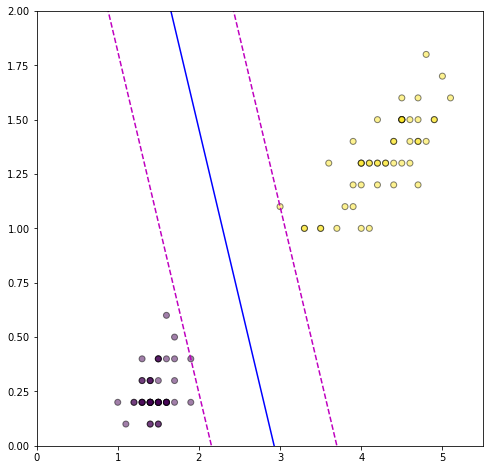

In [8]:
x_min = 0
x_max = 5.5
y_min = 0
y_max = 2
xx = np.linspace(x_min, x_max)
a = -w[0]/w[1]
yy = a*xx - (b)/w[1]
margin = 1 / np.sqrt(np.sum(w**2))
yy_neg = yy - np.sqrt(1 + a**2) * margin
yy_pos = yy + np.sqrt(1 + a**2) * margin
plt.figure(figsize=(8, 8))
plt.plot(xx, yy, "b-")
plt.plot(xx, yy_neg, "m--")
plt.plot(xx, yy_pos, "m--")
colors = ["steelblue", "orange"]
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), alpha=0.5, edgecolors="black")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.show()

#### Random data divided into groups on the basis of ref_plane function parameters

In [9]:
def ref_plane(X,Y):
    return 1 + 2* X + 10* Y

In [10]:
no_of_points = 50
X1 = np.random.random(no_of_points)*3 - 1.5
X2 = np.random.random(no_of_points)*3 - 1.5
values = ref_plane(X1, X2)
classes, class_color = np.where(values>0, 1, -1), np.where(values>0, 'r', 'b')
X = np.concatenate([X1[:,np.newaxis], X2[:,np.newaxis]], axis = 1)
Y = np.array(classes, dtype=float)

In [11]:
w, b, M = SVM.SVM(X, Y[:,np.newaxis])

     pcost       dcost       gap    pres   dres
 0: -1.1058e+01 -2.5163e+01  1e+02  1e+01  2e+00
 1: -2.6103e+01 -3.1028e+01  7e+01  4e+00  1e+00
 2: -6.9096e+01 -7.0230e+01  7e+01  4e+00  8e-01
 3: -9.4421e+01 -7.8017e+01  6e+01  2e+00  5e-01
 4: -7.1340e+01 -6.4123e+01  2e+01  7e-01  1e-01
 5: -5.7536e+01 -5.7960e+01  9e+00  2e-01  4e-02
 6: -5.6307e+01 -5.6312e+01  1e-01  2e-03  4e-04
 7: -5.6291e+01 -5.6291e+01  1e-03  2e-05  4e-06
 8: -5.6291e+01 -5.6291e+01  1e-05  2e-07  4e-08
 9: -5.6291e+01 -5.6291e+01  1e-07  2e-09  4e-10
Optimal solution found.


In [12]:
w, b, M

(array([ 1.41781839, 10.51529085]), 0.9844649095568334, 0.09424675086040352)

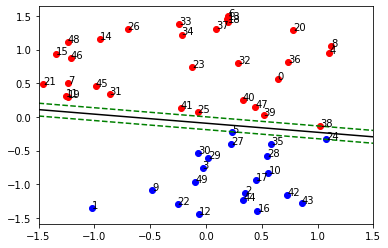

In [13]:
x_min=-1.5
x_max=1.5
plt.xlim(x_min,x_max)
for i in range(X.shape[0]):
    plt.scatter(X[i,0], X[i,1], c=class_color[i])
    plt.annotate(i, (X[i,0], X[i,1]))
x1_values = np.linspace(-1.5,1.5,100)
hyperplane_X1 = (-1*x1_values*w[0]- b)/w[1]
poz_margin_line = hyperplane_X1 + np.sqrt(1 + (w[0]/w[1])**2)*M
neg_margin_line = hyperplane_X1 - np.sqrt(1 + (w[0]/w[1])**2)*M
plt.plot(x1_values, hyperplane_X1, color='k')
plt.plot(x1_values, poz_margin_line, c='g',ls='--' )
plt.plot(x1_values, neg_margin_line, c='g',ls='--' )

In [15]:
X_test = np.array([1.5, -0.2])
value = SVM.get_SVM_val(X_test, w, b)

In [17]:
value, SVM.SVM_predict(X_test, w, b)

(1.0081343215122254, 1)

### SVM with Scikit-learn

In [18]:
from sklearn import svm

In [19]:
svm_cl = svm.SVC(kernel='linear')

In [20]:
svm_cl.fit(X[1::2], Y[1::2]);

In [21]:
Y_pred = svm_cl.predict(X[::2])

In [22]:
Y_pred_color = np.where(Y_pred==1, 'r', 'b')